In [1]:
from feature_process import *
from data_process import *
from pose_cluster import *

In [2]:
feat_type = 'bsF'
model_type = 'svm'
add_cluster = 'Y'
classes = 3

basal: 65  ,pain: 15  sng: 25  pH7.4: 15  sngKO: 6  CapKO: 4
pose clustering...
motions num:  50
bad motions: 14


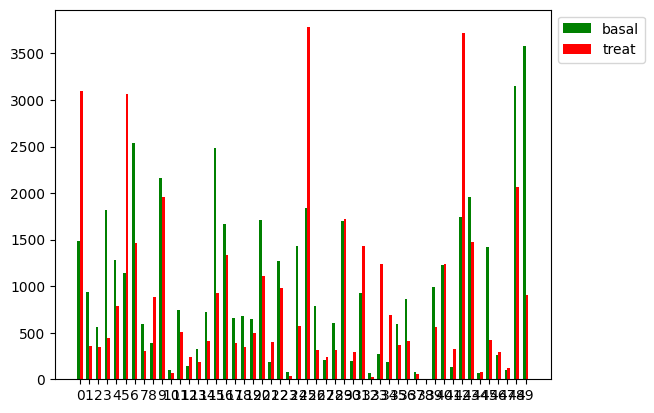

In [3]:
if feat_type == 'frame':
    dlc_root = r'..\final_data\landmark5'
    dlc = DataSet(dlc_root)
else:
    dlc_root = r'..\final_data\landmark7'
    if feat_type[-1]=='H':
        bs_root = r'..\final_data\bsoidfeat'
    else:
        bs_root = r'..\final_data\bsoidfeat2'
    dlc = DataSet(dlc_root, bsoid=bs_root)
dlc.generate_feature(feat_type=feat_type)

if add_cluster == 'Y':
    print('pose clustering...')
    dlc.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=50, cls_type='km', clf_type='svm')

In [4]:
res_te = []
res_tt = []
res_te0 = []
res_tt0 = []

i=10
# for i in range(10):
dlc.generate_train_test(split=0.5, motion_del=False, k=i+1)

# model
x_train = np.concatenate(dlc.data['x_train'])
y_train = np.concatenate(dlc.data['y_train'])
model = Analysis(model_type=model_type, classes=classes)
model.train(x_train,y_train)
# x_test = np.concatenate(dlc.data['x_test'])
# y_test = np.concatenate(dlc.data['y_test'])
# res_te.append(model.analysis2(x_test, y_test))
# # res_te0.append(model.analysis(x_test, y_test))
# x_val = np.concatenate(dlc.data['x_val'])
# y_val = np.concatenate(dlc.data['y_val'])
# res_tt.append(model.analysis2(x_val, y_val))
    # res_tt0.append(model.analysis(x_val, y_val))

In [6]:
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)res_te.csv', np.array(res_te), delimiter=',', fmt='%.2f')
np.savetxt(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)res_tt.csv', np.array(res_tt), delimiter=',', fmt='%.2f')

In [7]:
# joblib.dump(model.model, r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)model.sav')

['C:\\Users\\x\\Desktop\\final_data/analysis_SPDR/(YSNN_SVM)model.sav']

In [6]:
dlc.generate_train_test(split=0.1, motion_del=False, k=10)
model = Analysis(model_type=model_type, classes=classes)
x_train = np.concatenate(dlc.data['x_train'])
y_train = np.concatenate(dlc.data['y_train'])
model.model = joblib.load(r'C:\Users\x\Desktop\final_data/analysis_SPDR/(YSNN_SVM)model.sav')

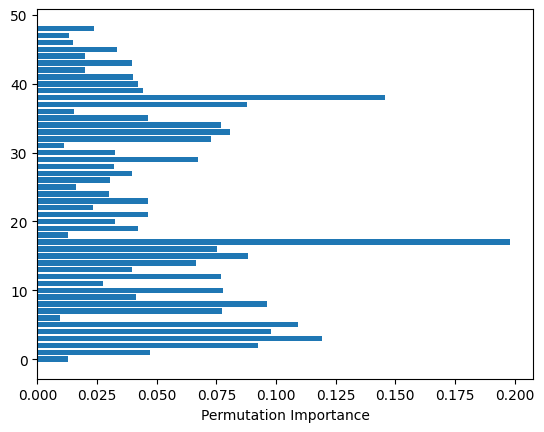

In [7]:
imp = model.feat_importance(x_train,y_train, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)FI.jpg')

In [ ]:
joblib.dump(imp, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)imp.sav')

In [ ]:
## plot method tmp
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(48)
y = np.arange(48)
cell = [y.astype('object')]

fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(111)


y = np.array(y)
cell = np.array(cell)

ax.title.set_text('subtitles[i]')
width = 0.3
x = np.arange(len(y))
spare_width = (1 - width)


ax.bar(x-width, y, width)#, label=legends[compare][r])
ax.set_xlim(-spare_width,len(x)-spare_width)
plt.xticks([])
plt.ylabel('axes[s]')
# plt.legend(loc='center right', bbox_to_anchor=(1.28, 0.5))

# plot table
table = plt.table(cellText=cell,
        rowLabels=['row_labels'],
        colLabels=['']*len(y),
        loc='bottom')

table.auto_set_font_size(True)
# table.set_fontsize(8)

# if save_root:
#     plt.savefig(save_root+cmp_titles[compare]+'_'+axess[s]+'_'+str(i+1)+'.png', bbox_inches="tight")

### MISC

<BarContainer object of 258 artists>

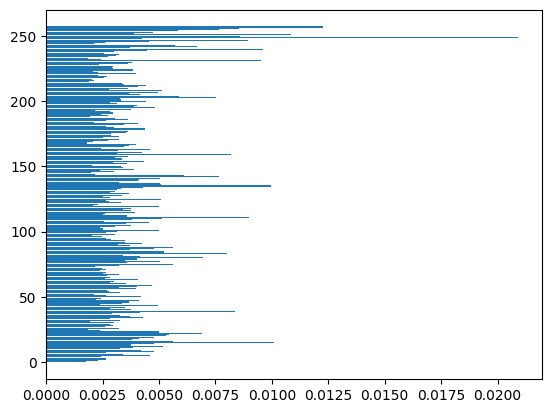

In [12]:
imp = model.model.feature_importances_
plt.barh(np.arange(len(imp)),imp)

In [8]:
joblib.dump(imp, r'C:\Users\x\Desktop\final_data/analysis_imp/(YSNN_SVM)imp.sav')

['C:\\Users\\x\\Desktop\\final_data/analysis_imp/(YSNN_SVM)imp.sav']

Text(0.5, 0, 'Importance Sum')

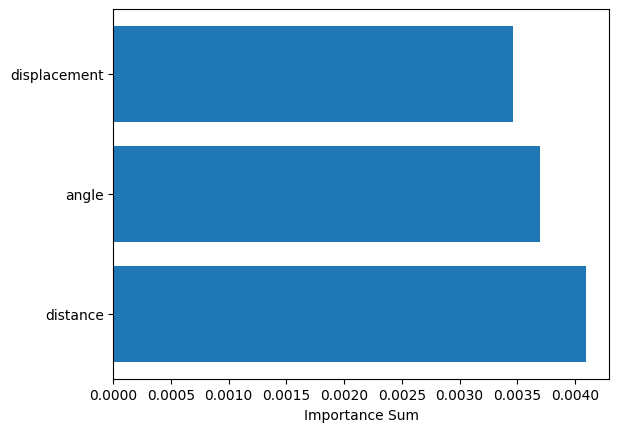

In [13]:
feature_names = ['distance','angle','displacement']
features = np.array(feature_names)
x = [0,0,0]
for i in range(21):
    x[0]+=imp[i]/21
    x[1]+=imp[21+i]/21
for i in range(7):
    x[2]+=imp[42+i]/7
plt.barh(features, x)
plt.xlabel("Importance Sum")

Text(0.5, 0, 'Importance sum')

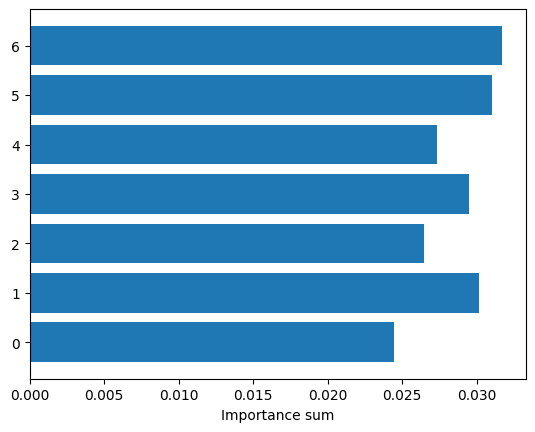

In [14]:
x = [0,0,0,0,0,0,0]

i=0
for d in range(7,-1,-1):
    for j in range(1,d):
        x[7-d]+=imp[i+j]/2
        x[7-d+j]+=imp[i+j]/2
        i+=1

i=21
for d in range(7,-1,-1):
    for j in range(1,d):
        x[7-d]+=imp[i+j]/2
        x[7-d+j]+=imp[i+j]/2
        i+=1

for j in range(7):
    x[j]+=imp[42+j]

features = np.arange(7)
plt.barh(features, x)
plt.xlabel("Importance sum")

In [16]:
np.argmax(imp)

249

In [18]:
len(imp)

258

Text(0.5, 0, 'Importance Sum')

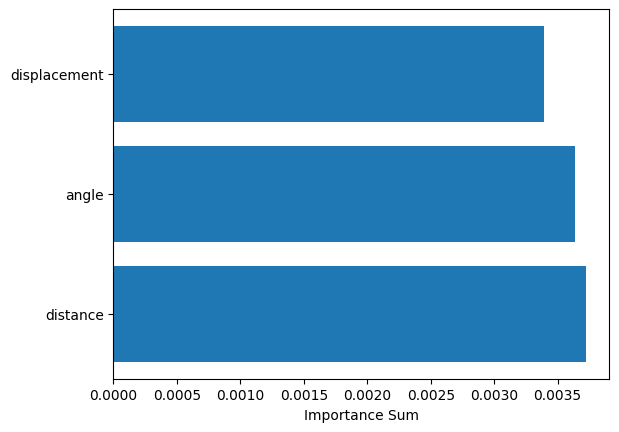

In [20]:
x = [np.mean(imp[0:120]),np.mean(imp[120:180]),np.mean(imp[180:240])]
features = ['distance','angle','displacement']
plt.barh(features, x)
plt.xlabel("Importance Sum")